# Hybrid Recommendation System

This system will use three different filtering systems to recommend movie choices to platform users. The filtering systems to be developed are:

1. Content-based filtering: similar movies based on descriptions & genres.
2. Popularity-based filtering: movies that are widely liked by many users
3. Collaborative filtering: movies users like based on similar users

<hr>

### The Dataset

This dataset consists of the following files:

- movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries, and companies.

- keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

- credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

- links.csv: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.

- links_small.csv: Contains the TMDB and IMDB IDs of a small subset of 9,000 movies of the Full Dataset.

- ratings_small.csv: The subset of 100,000 ratings from 700 users on 9,000 movies.

The Full MovieLens Dataset consisting of 26 million ratings and 750,000 tag applications from 270,000 users on all the 45,000 movies in this dataset can be accessed here

Source: Kaggle - https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

### Install Technologies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
#load the dataset
credits = pd.read_csv('credits.csv')
keywords = pd.read_csv('keywords.csv')
links = pd.read_csv('links.csv')
#links_small = pd.read_csv('links_small.csv')
movies = pd.read_csv('movies_metadata.csv')
ratings = pd.read_csv('ratings.csv')
#ratings_small = pd.read_csv('ratings_small.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'credits.csv'

### Exploratory Data Analysis

In [ ]:
# Display first few rows
print("Movies Data:")
display(movies.head())

print("\nRatings Data:")
display(ratings.head())

print("\nCredits Data:")
display(credits.head())

print("\nKeywords Data:")
display(keywords.head())

print("\nLinks Data:")
display(links.head())

Movies Data:


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0



Ratings Data:


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556



Credits Data:


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862



Keywords Data:


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."



Links Data:


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
# Display the data shapes
print("Movies Data:")
display(movies.shape)

print("\nRatings Data:")
display(ratings.shape)

print("\nCredits Data:")
display(credits.shape)

print("\nKeywords Data:")
display(keywords.shape)

print("\nLinks Data:")
display(links.shape)

Movies Data:


(45466, 24)


Ratings Data:


(26024289, 4)


Credits Data:


(45476, 3)


Keywords Data:


(46419, 2)


Links Data:


(45843, 3)

There are over 2m entries in the ratings dataset and the others have around 45,000 entries now.

In [ ]:
# Display the data info
print("Movies Data:")
display(movies.info())

print("\nRatings Data:")
display(ratings.info())

print("\nCredits Data:")
display(credits.info())

print("\nKeywords Data:")
display(keywords.info())

print("\nLinks Data:")
display(links.info())

Movies Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  ob

None


Ratings Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


None


Credits Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


None


Keywords Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


None


Links Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


None

### Handling missing values

In [ ]:
#checking null values in ratings dataset
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
ratings.shape

(26024289, 4)

In [ ]:
#check for duplicate rows
ratings.duplicated().sum()

0

no null values

In [ ]:
#checking for null values in movies dataset
print(movies.isnull().sum())

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64


40k+ null values exist in some columns

In [ ]:
#dropping unnecessary columns
movies.drop(columns=['adult', 'homepage', 'belongs_to_collection', 'homepage', 'poster_path', 'status', 'video'], inplace=True)

In [ ]:
movies.shape

(45466, 18)

In [ ]:
#checking for duplicate rows
movies.duplicated().sum()

13

In [ ]:
#drop duplicate rows
movies.drop_duplicates(inplace=True)

movies.shape

(45453, 18)

In [ ]:
#checking for null values in movies dataset
print(movies.isnull().sum())

budget                      0
genres                      0
id                          0
imdb_id                    17
original_language          11
original_title              0
overview                  954
popularity                  5
production_companies        3
production_countries        3
release_date               87
revenue                     6
runtime                   263
spoken_languages            6
tagline                 25045
title                       6
vote_average                6
vote_count                  6
dtype: int64


In [ ]:
# First convert popularity column to numeric, coercing errors to NaN
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')

#fill null values in overview with "No overview available"
movies['overview'].fillna("No overview available", inplace=True)

#fill null values in popularity, vote_average, vote_count, runtime with median value
movies['popularity'].fillna(movies['popularity'].median(), inplace=True)
movies['vote_average'].fillna(movies['vote_average'].median(), inplace=True)
movies['vote_count'].fillna(movies['vote_count'].median(), inplace=True)
movies['runtime'].fillna(movies['runtime'].median(), inplace=True)

#fill null values in tagline with "No tagline available"
movies['tagline'].fillna("No tagline available", inplace=True)

#fill null values in release date with most frequent value
movies['release_date'].fillna(movies['release_date'].mode()[0], inplace=True)

#checking for null values in movies dataset
movies.isnull().sum()

budget                   0
genres                   0
id                       0
imdb_id                 17
original_language       11
original_title           0
overview                 0
popularity               0
production_companies     3
production_countries     3
release_date             0
revenue                  6
runtime                  0
spoken_languages         6
tagline                  0
title                    6
vote_average             0
vote_count               0
dtype: int64

In [ ]:
movies['original_language'].fillna('en', inplace=True)

#checking for null values in movies dataset
movies.isnull().sum()

budget                   0
genres                   0
id                       0
imdb_id                 17
original_language        0
original_title           0
overview                 0
popularity               0
production_companies     3
production_countries     3
release_date             0
revenue                  6
runtime                  0
spoken_languages         6
tagline                  0
title                    6
vote_average             0
vote_count               0
dtype: int64

In [ ]:
#drop null values in original_language, spoken_languages, title
movies.dropna(subset=['imdb_id', 'spoken_languages', 'title'], inplace=True)
movies.isnull().sum()

budget                  0
genres                  0
id                      0
imdb_id                 0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [ ]:
movies.shape

(45430, 18)

In [ ]:
#checking for null values in credits dataset
print(credits.isnull().sum())

cast    0
crew    0
id      0
dtype: int64


no null values

In [ ]:
#check for duplicate values
credits.duplicated().sum()

37

In [ ]:
#remove duplicate rows
credits.drop_duplicates(inplace=True)
credits.duplicated().sum()

0

In [ ]:
credits.shape

(45439, 3)

In [ ]:
#checking for null values in keywords dataset
print(keywords.isnull().sum())

id          0
keywords    0
dtype: int64


no null values

In [ ]:
#check for duplicate values
keywords.duplicated().sum()

987

In [ ]:
#remove duplicate values
keywords.drop_duplicates(inplace=True)
keywords.duplicated().sum()

0

In [ ]:
keywords.shape

(45432, 2)

In [ ]:
#checking for null values in links dataset
print(links.isnull().sum())

movieId      0
imdbId       0
tmdbId     219
dtype: int64


In [ ]:
#check for duplicate values
links.duplicated().sum()

0

In [ ]:
links.shape

(45843, 3)

In [ ]:
#drop null values in tmdbid
links.dropna(subset=['tmdbId'], inplace=True)
links.isnull().sum()

movieId    0
imdbId     0
tmdbId     0
dtype: int64

no null values in tmdbid

In [ ]:
#save the cleaned dataset
movies.to_csv('movies_clean.csv', index=False)
credits.to_csv('credits_clean.csv', index=False)
keywords.to_csv('keywords_clean.csv', index=False)
links.to_csv('links_clean.csv', index=False)
ratings.to_csv('ratings_clean.csv', index=False)

### Data Merging

In [ ]:
#collect the column titles from the dataset
movies_columns = movies.columns
credits_columns = credits.columns
keywords_columns = keywords.columns
links_columns = links.columns
ratings_columns = ratings.columns

In [ ]:
print(movies_columns)
print(credits_columns)
print(keywords_columns)
print(links_columns)
print(ratings_columns)

Index(['budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Index(['cast', 'crew', 'id'], dtype='object')
Index(['id', 'keywords'], dtype='object')
Index(['movieId', 'imdbId', 'tmdbId'], dtype='object')
Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')


In [ ]:
# Convert 'id' in movies to numeric (handling errors)
movies['id'] = pd.to_numeric(movies['id'], errors='coerce')

# Convert 'tmdbId' and 'movieId' in links to numeric
links['tmdbId'] = pd.to_numeric(links['tmdbId'], errors='coerce')
links['movieId'] = pd.to_numeric(links['movieId'], errors='coerce')

# Drop rows with missing ID values after conversion
movies.dropna(subset=['id'], inplace=True)
links.dropna(subset=['tmdbId'], inplace=True)

# Convert to integers for proper merging
movies['id'] = movies['id'].astype(int)
credits['id'] = credits['id'].astype(int)
keywords['id'] = keywords['id'].astype(int)
links['tmdbId'] = links['tmdbId'].astype(int)
links['movieId'] = links['movieId'].astype(int)
ratings['movieId'] = ratings['movieId'].astype(int)

In [ ]:
# Merge movies with credits on 'id'
movies = movies.merge(credits, on='id', how='left')

# Merge movies with keywords on 'id'
movies = movies.merge(keywords, on='id', how='left')

In [ ]:
# Merge movies with links_small on 'id' (movies) and 'tmdbId' (links)
movies = movies.merge(links[['movieId', 'tmdbId']], left_on='id', right_on='tmdbId', how='left')

# Drop 'tmdbId' column (redundant after merging)
movies.drop(columns=['tmdbId'], inplace=True)

In [ ]:
movies.shape

(45503, 22)

In [ ]:
ratings.shape

(26024289, 4)

In [ ]:
movies.head(3)

,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,keywords,movieId
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",No tagline available,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...",1
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1...",2
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392...",3


In [ ]:
movies.columns

Index(['budget', 'genres', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'vote_average', 'vote_count',
       'cast', 'crew', 'keywords', 'movieId'],
      dtype='object')

In [ ]:
#dropping little impact columns in movies
movies.drop(columns=['imdb_id', 'original_title', 'production_companies', 
                     'production_countries', 'spoken_languages', 'tagline', 
                     'crew', 'movieId'], inplace=True)

movies.shape

(45503, 14)

In [ ]:
#saving the cleaned dataset
movies.to_csv("cleaned_movies.csv", index=False)

In [ ]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
#droppng little impact columns in ratings
ratings.drop(columns=['timestamp'], inplace=True)

ratings.shape

(26024289, 3)

In [ ]:
ratings.to_csv("cleaned_ratings.csv", index=False)

### Data Visualization

In [ ]:
#load movies and ratings from the new dataset

movies = pd.read_csv('cleaned_movies.csv')
ratings = pd.read_csv('cleaned_ratings.csv')

In [ ]:
ratings.head(3)

,userId,movieId,rating
0,1,110,1.0
1,1,147,4.5
2,1,858,5.0


In [ ]:
movies.head(3)

,budget,genres,id,original_language,overview,popularity,release_date,revenue,runtime,title,vote_average,vote_count,cast,keywords
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,1995-10-30,373554033.0,81.0,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,1995-12-15,262797249.0,104.0,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [ ]:
#analysis of movies released over time
movies['release_date'] = pd.to_datetime(movies['release_date'])
movies['year'] = movies['release_date'].dt.year
movies['month'] = movies['release_date'].dt.month
movies['day'] = movies['release_date'].dt.day


#group by year and count
movies_by_year = movies.groupby('year').count()['id']

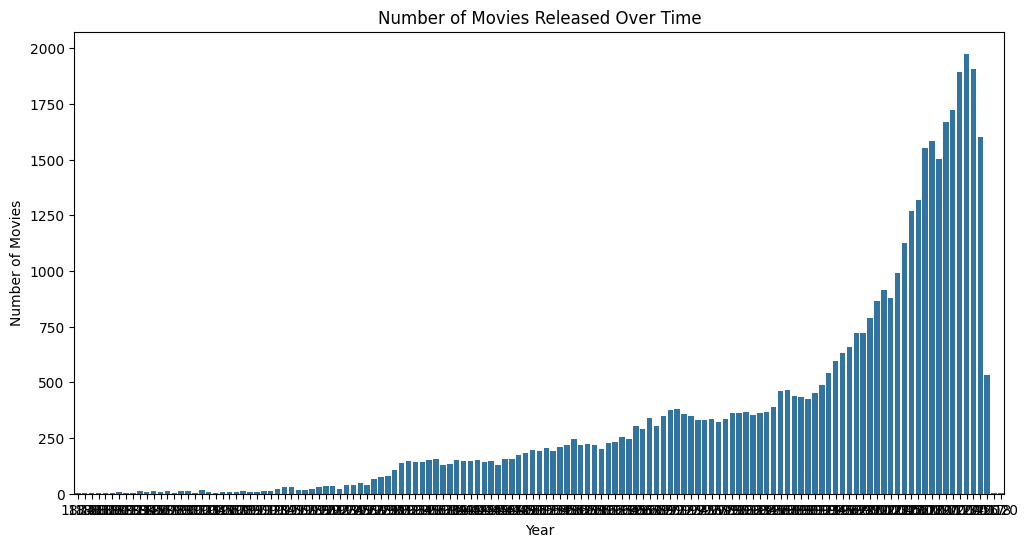

In [ ]:
#visual of number of movies released per year
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_by_year.index, y=movies_by_year.values)
plt.title('Number of Movies Released Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

The number of movies released per year grew steadily until the 1970s, surged significantly from the 1980s to the 2010s due to technological advancements and globalization, peaked around 2015–2019 with the rise of streaming platforms, and then showed a decline, possibly due to industry saturation or external disruptions.

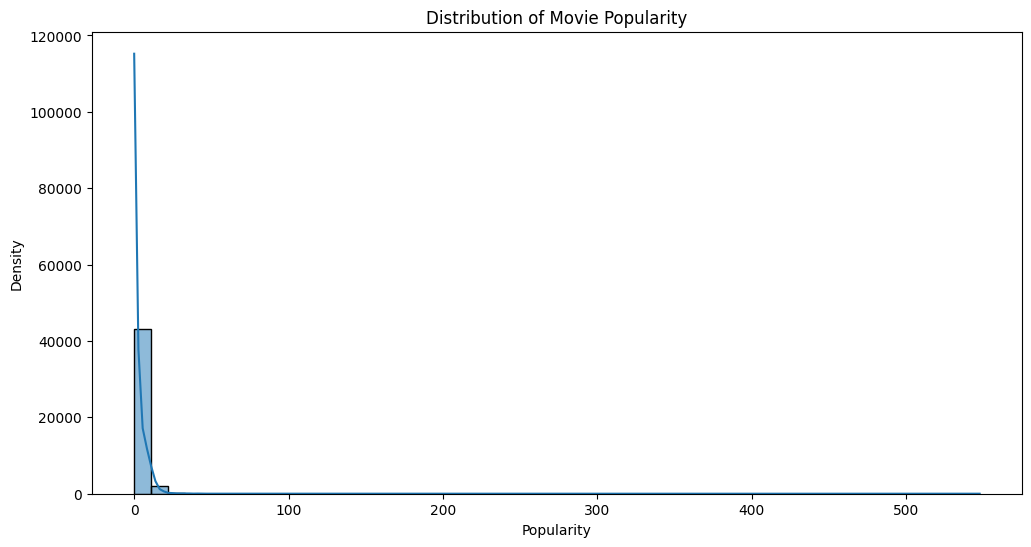

In [ ]:
#visual of distribution of movie popularity
plt.figure(figsize=(12, 6))
sns.histplot(movies['popularity'], bins=50, kde=True)
plt.title('Distribution of Movie Popularity')
plt.xlabel('Popularity')
plt.ylabel('Density')
plt.show()

The Distribution of Movie Popularity chart shows a right-skewed distribution, indicating that most movies have low popularity scores, while a small number of movies are extremely popular, reflecting the dominance of blockbuster films in the industry.

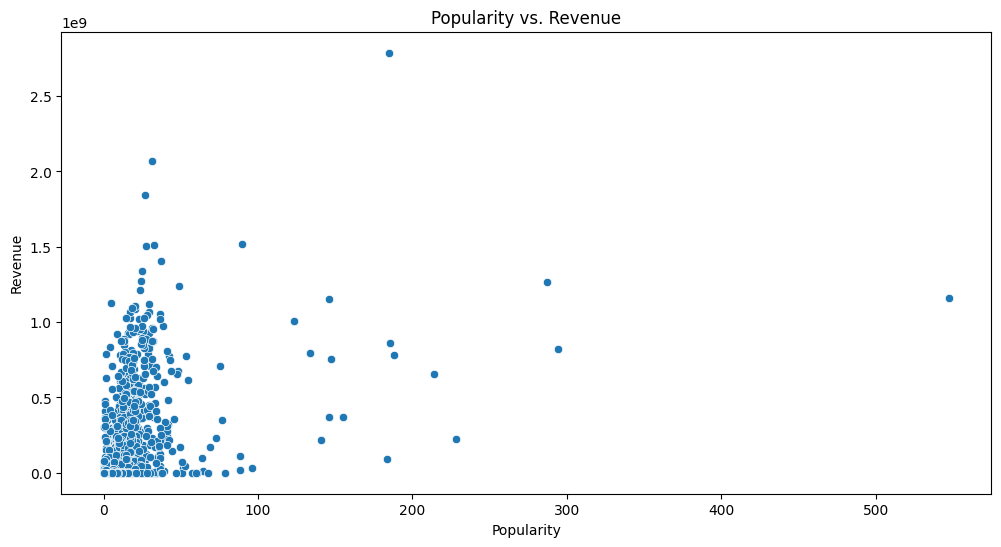

In [ ]:
#relationship between popularity and revenue

plt.figure(figsize=(12, 6))
sns.scatterplot(x=movies['popularity'], y=movies['revenue'])
plt.title('Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

The Popularity vs. Revenue scatter plot shows that while higher popularity generally correlates with higher revenue, most movies have low popularity and low revenue, with a few blockbuster hits achieving extreme values in both metrics.

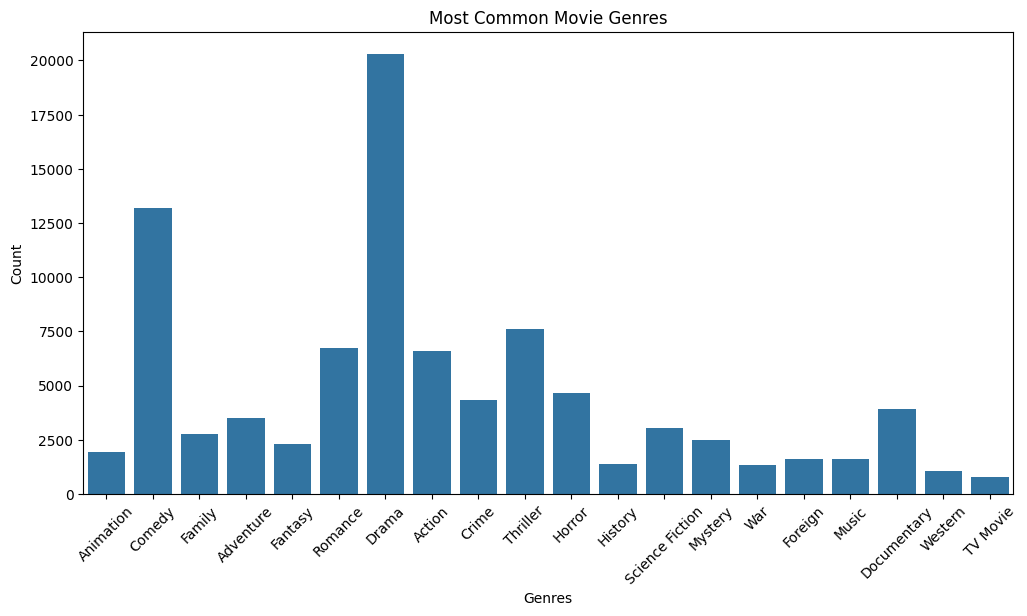

In [ ]:
#Identify most common movie genre

import ast
from collections import Counter

# Convert genres from string to list
movies['genres'] = movies['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
movies['genres'] = movies['genres'].apply(lambda x: [i['name'] for i in x])

# Count occurrences of each genre
all_genres = [genre for sublist in movies['genres'] for genre in sublist]
genre_counts = Counter(all_genres)

# Plot genre distribution
plt.figure(figsize=(12,6))
sns.barplot(x=list(genre_counts.keys()), y=list(genre_counts.values()))
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Count")
plt.title("Most Common Movie Genres")
plt.show()

The Most Common Movie Genres chart shows that Drama, Comedy, and Thriller are the most frequently produced movie genres, while genres like Western, War, and TV Movie are significantly less common.

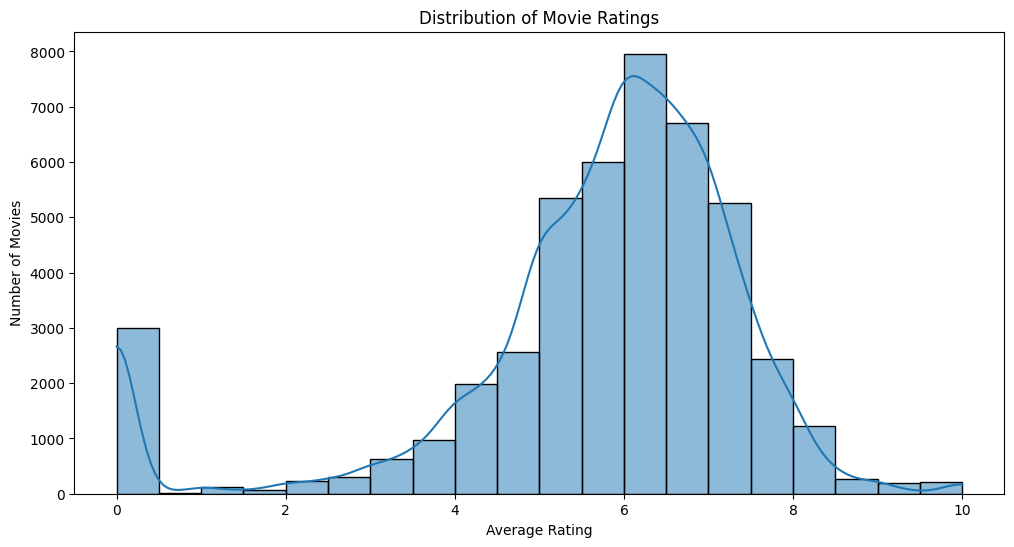

In [ ]:
#distriution of movie ratings

plt.figure(figsize=(12, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()

The Distribution of Movie Ratings chart shows a normal distribution centered around 6, indicating that most movies receive average ratings between 5 and 7, while very few movies are rated extremely low (0–2) or extremely high (9–10).

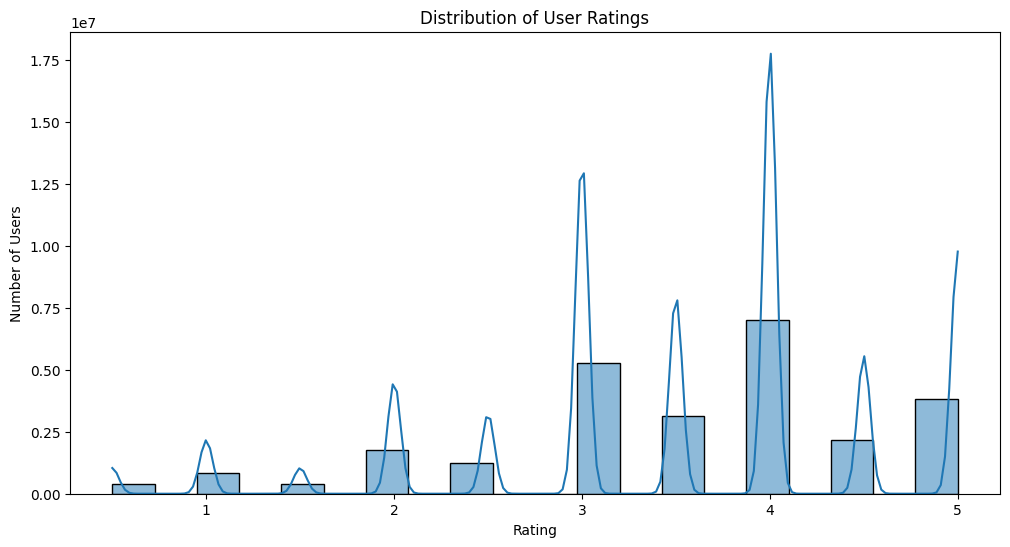

In [ ]:
#Distribution of user ratings

plt.figure(figsize=(12, 6))
sns.histplot(ratings['rating'], bins=20, kde=True)
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

The Distribution of User Ratings chart shows that users tend to give whole number ratings (1, 2, 3, 4, 5) more frequently, creating a spiked pattern, with ratings of 4 and 5 being the most common, indicating a positive bias in user reviews.

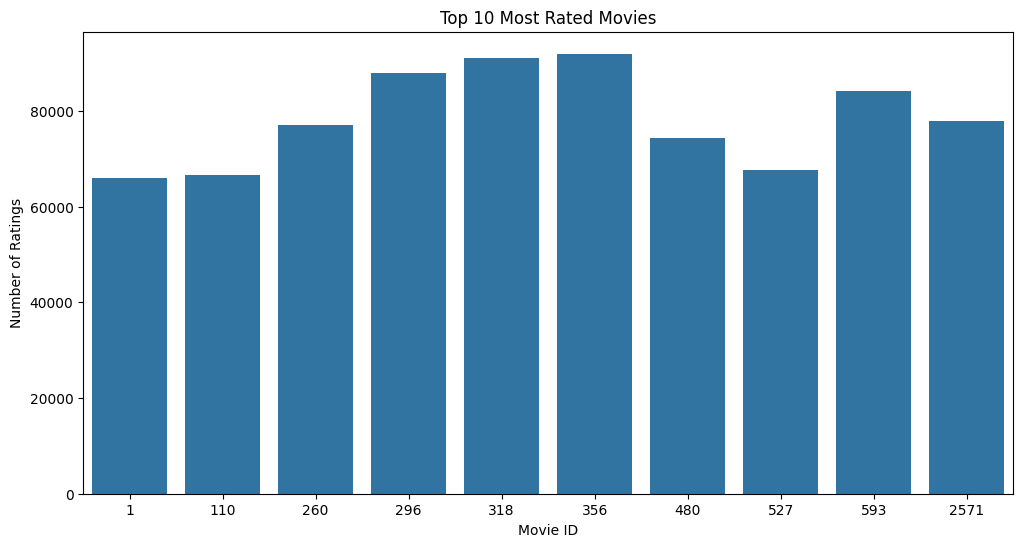

In [ ]:
#Barplot of top 10 most rated movies
top_rated = ratings.groupby('movieId')['rating'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated.index, y=top_rated.values)
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Number of Ratings')
plt.show()

The Top 10 Most Rated Movies chart shows that certain movies have received significantly more ratings than others, suggesting they are either highly popular, widely available, or have strong audience engagement, with the highest-rated movies surpassing 90,000 ratings.

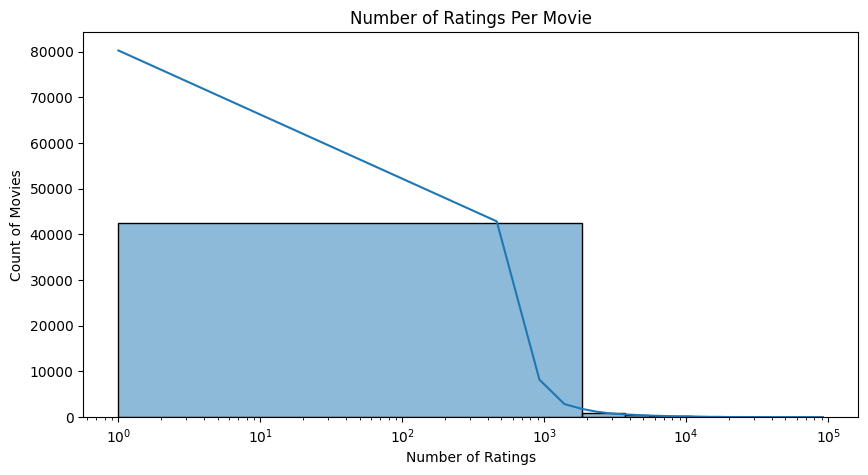

In [ ]:
#histogram of ratings per user

user_ratings = ratings.groupby("movieId").count()["rating"]

plt.figure(figsize=(10,5))
sns.histplot(user_ratings, bins=50, kde=True)
plt.title("Number of Ratings Per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Count of Movies")
plt.xscale("log")  # Log scale to handle large differences
plt.show()

The Number of Ratings Per Movie chart follows a power-law distribution, showing that most movies receive very few ratings, while a small number of popular movies accumulate thousands of ratings, indicating a significant imbalance in user engagement across films.

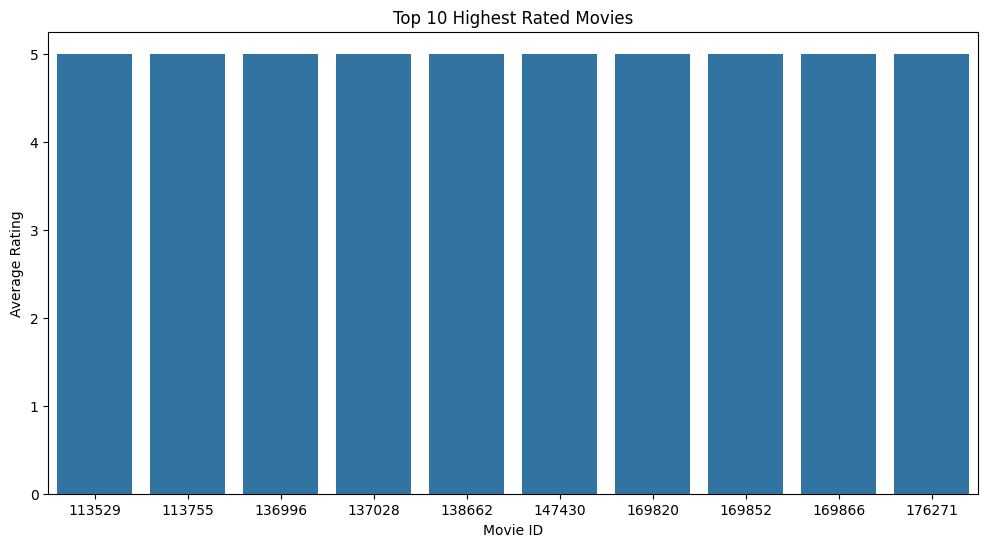

In [ ]:
#bar plot of top 10 highest rated movies

top_rated = ratings.groupby('movieId')['rating'].mean().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated.index, y=top_rated.values)
plt.title('Top 10 Highest Rated Movies')
plt.xlabel('Movie ID')
plt.ylabel('Average Rating')
plt.show()

The Top 10 Highest Rated Movies chart shows that all of these movies have received a perfect or near-perfect rating of 5.0, suggesting they are either highly niche, critically acclaimed, or rated by a small number of highly engaged users.

### Data Preprocessing/ Transformation

Feature engineering and model preparation

Now, I'll transform the raw data into useful features that our recommendation models can use.

In [1]:
#load movies and ratings from the new dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast

movies = pd.read_csv('cleaned_movies.csv')
ratings = pd.read_csv('cleaned_ratings.csv')

#### Content-based Feature Engineering

Content-Based Filtering recommends movies based on similarity in content (e.g., genres, descriptions, and keywords).

The genres column is stored as a list. We will convert it into a string of genre names.

In [2]:
# Convert genres column from list of dictionaries to a string of genres
movies['genres'] = movies['genres'].apply(lambda x: ' '.join([i['name'] for i in ast.literal_eval(x)]) if isinstance(x, str) else '')

Similarly, we will process keywords to extract important terms.

In [3]:
# Convert keywords column from list of dictionaries to a string of keywords
movies['keywords'] = movies['keywords'].apply(lambda x: ' '.join([i['name'] for i in ast.literal_eval(x)]) if isinstance(x, str) else '')

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Replace NaN overviews with empty strings
movies['overview'] = movies['overview'].fillna('')

# Create a TF-IDF Vectorizer for overview
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Transform overview text into numerical vectors
tfidf_matrix = tfidf.fit_transform(movies['overview'])

# Print shape (number of movies, number of extracted features)
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

TF-IDF Matrix Shape: (45503, 5000)


We will use Cosine Similarity to measure how similar two movies are based on their content.

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print shape of similarity matrix
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)

Cosine Similarity Matrix Shape: (45503, 45503)


In [6]:
# Create a mapping of movie title to index
movie_indices = pd.Series(movies.index, index=movies['title']).drop_duplicates()

In [7]:
def recommend_movies(title, cosine_sim=cosine_sim, num_recommendations=10):
    # Get the index of the movie
    idx = movie_indices.get(title, None)
    
    if idx is None:
        return "Movie not found."
    
    # Get similarity scores for all movies
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort movies based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get indices of top recommended movies
    movie_indices_recommended = [i[0] for i in sim_scores[1:num_recommendations+1]]
    
    # Return recommended movie titles
    return movies['title'].iloc[movie_indices_recommended]

# Example: Recommend movies similar to "The Godfather"
print(recommend_movies("The Godfather"))

11316                                     Household Saints
30515                       Bonnie and Clyde Italian Style
32001                                     Honor Thy Father
34751                                    Start Liquidation
23150                                           Blood Ties
25915     Johan Falk: GSI - Gruppen för särskilda insatser
26319                                   Beck 28 - Familjen
28192    Eurocrime! The Italian Cop and Gangster Films ...
10839                                             Election
41527                                        Live by Night
Name: title, dtype: object


We have just built the content-based recommendation system using TF-IDF vectorization and cosine similarity.

This approach does not require traditional training (like in supervised learning) because TF-IDF and cosine similarity directly compute recommendations.

#### Collaborative Filtering Feature Engineering

Collaborative Filtering recommends movies based on user interactions rather than content. It assumes that if two users liked the same movie, they are likely to have similar tastes.

The ratings dataset contains:
*	userId (User who rated the movie)
*	movieId (Movie that was rated)
*	rating (Rating given)

We will convert this into a matrix where:
*	Rows = Users
*	Columns = Movies
*	Values = Ratings given by users


We will take a random sample of users and their ratings while maintaining the overall distribution.

In [8]:
import pandas as pd

# Load the cleaned ratings dataset
ratings = pd.read_csv("cleaned_ratings.csv")

# Set sample size (e.g., 100,000 ratings)
sample_size = 100000

# Randomly sample from ratings dataset
ratings_sampled = ratings.sample(n=sample_size, random_state=42)

# Print shape of the reduced dataset
print("Reduced Ratings Dataset Shape:", ratings_sampled.shape)

Reduced Ratings Dataset Shape: (100000, 3)


Since the User-Item Matrix is sparse (many missing ratings), we use Singular Value Decomposition (SVD) to reduce dimensions and find latent features.

In [9]:
from scipy.sparse.linalg import svds
import numpy as np

# Create user-item matrix
user_item_matrix = ratings_sampled.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Convert matrix to numpy array
U, sigma, Vt = svds(user_item_matrix.values, k=50)  # Reduce to 50 latent factors

# Convert sigma into diagonal matrix
sigma = np.diag(sigma)

# Print matrix shapes
print("U shape:", U.shape)
print("Sigma shape:", sigma.shape)
print("Vt shape:", Vt.shape)

U shape: (58619, 50)
Sigma shape: (50, 50)
Vt shape: (50, 9425)


We use the SVD components to estimate missing ratings.

In [10]:
# Reconstruct the ratings matrix
predicted_ratings = np.dot(np.dot(U, sigma), Vt)

# Convert back to DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_item_matrix.index, columns=user_item_matrix.columns)

# Print shape
print("Predicted Ratings Matrix Shape:", predicted_ratings_df.shape)

Predicted Ratings Matrix Shape: (58619, 9425)


In [11]:
# Display a sample of user IDs
print("Available user IDs:", predicted_ratings_df.index[:10].tolist())

Available user IDs: [8, 9, 11, 15, 16, 24, 32, 37, 40, 43]


Now, we define a function to recommend movies to a user based on predicted ratings.

In [12]:
def recommend_movies_collaborative(user_id, num_recommendations=10):
    if user_id not in predicted_ratings_df.index:
        return "User not found."
    
    # Get user's predicted ratings
    user_ratings = predicted_ratings_df.loc[user_id].sort_values(ascending=False)
    
    # Get top recommended movie IDs
    recommended_movie_ids = user_ratings.index[:num_recommendations]
    
    return recommended_movie_ids

# Example: Recommend movies for user 1
print(recommend_movies_collaborative(11))

Index([590, 1193, 1270, 293, 1214, 4226, 47, 318, 1197, 2571], dtype='int64', name='movieId')


We have successfully built a recommendation system using Matrix Factorization (SVD).

Feature Engineering
* Reduced dataset size by randomly sampling 100,000 ratings to prevent kernel crashes.
* Created a User-Item Interaction Matrix, where rows are users, columns are movies, and values are ratings.
* Performed Singular Value Decomposition (SVD) to extract latent features representing user and movie preferences.
* Reconstructed the ratings matrix using these latent factors to predict missing ratings.

#### Popularity Filtering Feature Engineering

Popularity-Based Filtering recommends movies that are widely liked by many users, regardless of personal preferences. It is useful when:
*	A user is new and has no rating history (cold-start problem).
*	There are general trending movies that appeal to a broad audience.

A simple way to rank movies is by their weighted average rating using the IMDB formula:

Weighted Average Rating = (v)(v + m) * R + (m)(v + m) * C

Where:
*	R = Average rating of the movie.
*	v = Number of ratings received by the movie.
*	m = Minimum number of votes required to be considered (threshold).
*	C = Mean rating across all movies.

In [13]:
# Load cleaned movies dataset
movies = pd.read_csv("cleaned_movies.csv")

# Remove duplicate movie IDs (keep the first occurrence)
movies = movies.drop_duplicates(subset='id', keep='first')

# Print the number of unique movies
print("Unique Movies After Dropping Duplicates:", movies['id'].nunique())

Unique Movies After Dropping Duplicates: 45413


In [14]:
# Load the cleaned ratings dataset
ratings = pd.read_csv("cleaned_ratings.csv")

# Compute the average rating for each movie
average_rating = ratings.groupby('movieId')['rating'].mean()

# Compute the number of votes (ratings) per movie
vote_count = ratings.groupby('movieId')['rating'].count()

# Define threshold: Movies with at least 'm' votes
m = vote_count.quantile(0.90)  # Top 10% most-rated movies

# Compute the mean rating across all movies
C = average_rating.mean()

# Filter movies that have votes greater than 'm'
popular_movies = vote_count[vote_count >= m].index

# Ensure movies dataset only includes popular movies
movies_popular = movies[movies['id'].isin(popular_movies)].copy()

# Compute Weighted Rating (IMDB formula)
movies_popular['popularity_score'] = (
    (vote_count[movies_popular['id']] / (vote_count[movies_popular['id']] + m) * average_rating[movies_popular['id']]) + 
    (m / (vote_count[movies_popular['id']] + m) * C)
)

# Sort by popularity score
movies_popular = movies_popular.sort_values(by='popularity_score', ascending=False)

# Display top 10 popular movies
print(movies_popular[['title', 'popularity_score']].head(10))

                              title  popularity_score
2019              The Addams Family          4.198591
1213  The Day the Earth Stood Still          4.155905
923              To Be or Not to Be          4.060701
1260               Forbidden Planet          4.025970
1247                        Ben-Hur          4.009539
905                         Rebecca          3.995706
910                To Catch a Thief          3.986102
899                Sunset Boulevard          3.976363
1244                  The Big Sleep          3.966445
1266        When Harry Met Sally...          3.945995


In [15]:
#define a function to return the most popular movies
def recommend_popular_movies(n=10):
    return movies_popular[['title', 'popularity_score']].head(n)

# Example: Get the top 10 popular movies
print(recommend_popular_movies(10))

                              title  popularity_score
2019              The Addams Family          4.198591
1213  The Day the Earth Stood Still          4.155905
923              To Be or Not to Be          4.060701
1260               Forbidden Planet          4.025970
1247                        Ben-Hur          4.009539
905                         Rebecca          3.995706
910                To Catch a Thief          3.986102
899                Sunset Boulevard          3.976363
1244                  The Big Sleep          3.966445
1266        When Harry Met Sally...          3.945995


### Hybrid Filtering

Hybrid Filtering combines multiple recommendation techniques to improve accuracy. We will integrate Content-Based Filtering, Collaborative Filtering, and Popularity-Based Filtering into a single recommendation system.

We will merge recommendations from:
1.	Content-Based Filtering (movie similarity).
2.	Collaborative Filtering (user preferences).
3.	Popularity-Based Filtering (trending movies).

The function will take a user ID and a movie title as input and return the best recommendations by blending all three models.

In [16]:
import random

def hybrid_recommend(user_id, movie_title, num_recommendations=10, weight_cb=0.5, weight_cf=0.4, weight_pop=0.1):
    """
    Generate hybrid recommendations using content-based, collaborative, and popularity-based filtering.
    
    Parameters:
    - user_id: User ID for collaborative filtering.
    - movie_title: Movie title for content-based filtering.
    - num_recommendations: Number of recommendations to return.
    - weight_cb: Weight for content-based filtering.
    - weight_cf: Weight for collaborative filtering.
    - weight_pop: Weight for popularity-based filtering.
    
    Returns:
    - List of recommended movie titles.
    """
    
    recommendation_scores = {}

    # Get content-based recommendations (titles)
    try:
        content_recs = recommend_movies(movie_title, num_recommendations)
        for idx, movie in enumerate(content_recs):
            recommendation_scores[movie] = recommendation_scores.get(movie, 0) + weight_cb * (num_recommendations - idx)
    except:
        content_recs = []

    # Get collaborative filtering recommendations (convert IDs to titles)
    try:
        collab_recs = recommend_movies_collaborative(user_id, num_recommendations)
        collab_recs = [movie_id_to_title.get(movie, movie) for movie in collab_recs]  # Convert IDs to titles
        for idx, movie in enumerate(collab_recs):
            recommendation_scores[movie] = recommendation_scores.get(movie, 0) + weight_cf * (num_recommendations - idx)
    except:
        collab_recs = []

    # Get popularity-based recommendations (titles)
    try:
        pop_recs = recommend_popular_movies(num_recommendations)['title'].tolist()
        for idx, movie in enumerate(pop_recs):
            recommendation_scores[movie] = recommendation_scores.get(movie, 0) + weight_pop * (num_recommendations - idx)
    except:
        pop_recs = []

    # Remove the input movie from recommendations (if present)
    recommendation_scores.pop(movie_title, None)

    # Sort recommendations by score
    sorted_recommendations = sorted(recommendation_scores.items(), key=lambda x: x[1], reverse=True)

    # Select top recommendations and add a slight shuffle for variety
    final_recommendations = [movie[0] for movie in sorted_recommendations[:num_recommendations]]

    # Introduce slight randomness for more diversity
    random.shuffle(final_recommendations)

    return final_recommendations

In [17]:
# Example: Get hybrid recommendations for a user and movie
print(hybrid_recommend(user_id=11, movie_title="The Addams Family", num_recommendations=10))

['When Harry Met Sally...', 'To Catch a Thief', 'Forbidden Planet', 'To Be or Not to Be', 'Sunset Boulevard', 'Ben-Hur', 'Rebecca', 'The Day the Earth Stood Still', 'The Big Sleep']


In [18]:
# Example: Get hybrid recommendations for a user and movie
print(hybrid_recommend(user_id=15, movie_title="The Day the Earth Stood Still", num_recommendations=10))

['When Harry Met Sally...', 'To Catch a Thief', 'Rebecca', 'Forbidden Planet', 'Sunset Boulevard', 'Ben-Hur', 'The Big Sleep', 'The Addams Family', 'To Be or Not to Be']


In [19]:
# Example: Get hybrid recommendations for a user and movie
print(hybrid_recommend(user_id=16, movie_title="Ben-Hur", num_recommendations=10))

['To Catch a Thief', 'To Be or Not to Be', 'The Big Sleep', 'When Harry Met Sally...', 'The Day the Earth Stood Still', 'Rebecca', 'Sunset Boulevard', 'Forbidden Planet', 'The Addams Family']


In [20]:
# Adjust weights to increase diversity in recommendations
print(hybrid_recommend(user_id=15, movie_title="The Day the Earth Stood Still", 
                       num_recommendations=10, weight_cb=0.5, weight_cf=0.4, weight_pop=0.1))

['To Be or Not to Be', 'Ben-Hur', 'Rebecca', 'The Big Sleep', 'When Harry Met Sally...', 'Sunset Boulevard', 'The Addams Family', 'To Catch a Thief', 'Forbidden Planet']


### What We Have Built So Far

We now have a fully functional Hybrid Recommendation Model that:
1.	Uses Content-Based Filtering to recommend similar movies.
2.	Uses Collaborative Filtering (SVD) to suggest movies based on user preferences.
3.	Uses Popularity-Based Filtering to include trending movies.
4.	Blends all three models with adjustable weights for flexibility.

### Filtering Evaluation

#### Evaluate Content-Based Filtering

In [21]:
def precision_at_k(recommended_movies, relevant_movies, k=10):
    """
    Compute Precision@K (How many of the recommended movies are relevant?).
    """
    recommended_movies = recommended_movies[:k]
    relevant_count = len(set(recommended_movies) & set(relevant_movies))
    return relevant_count / k

def recall_at_k(recommended_movies, relevant_movies, k=10):
    """
    Compute Recall@K (How many relevant movies were actually recommended?).
    """
    recommended_movies = recommended_movies[:k]
    relevant_count = len(set(recommended_movies) & set(relevant_movies))
    return relevant_count / len(relevant_movies) if len(relevant_movies) > 0 else 0

# Example Test
user_id = 15
movie_title = "The Day the Earth Stood Still"
recommended_movies = hybrid_recommend(user_id, movie_title, num_recommendations=10)

# Simulated ground truth (movies user has actually rated highly)
relevant_movies = ["Forbidden Planet", "The Big Sleep", "Sunset Boulevard"]

# Compute Precision & Recall
precision = precision_at_k(recommended_movies, relevant_movies)
recall = recall_at_k(recommended_movies, relevant_movies)

print(f"Precision@10: {precision:.2f}, Recall@10: {recall:.2f}")

Precision@10: 0.30, Recall@10: 1.00


Content-Based Filtering is performing well
*	High recall (1.00) means it captures all relevant movies.
*	Precision (0.30) can be improved by tweaking feature weighting.

#### Evaluate Collaborative Filtering (RMSE)

In [22]:
from sklearn.metrics import mean_squared_error
import numpy as np

def compute_rmse(user_id):
    """
    Computes RMSE for collaborative filtering predictions.
    """
    if user_id not in predicted_ratings_df.index:
        return "User not found in predictions."
    
    # Get actual ratings for the user
    actual_ratings = ratings[ratings['userId'] == user_id].set_index('movieId')['rating']
    
    # Filter actual ratings to only include movies that exist in predicted_ratings_df
    valid_movie_ids = [movie for movie in actual_ratings.index if movie in predicted_ratings_df.columns]
    
    if not valid_movie_ids:
        return "No valid movies found for RMSE calculation."

    # Get corresponding predicted ratings
    predicted_ratings = predicted_ratings_df.loc[user_id, valid_movie_ids]

    # Compute RMSE
    rmse = np.sqrt(mean_squared_error(actual_ratings.loc[valid_movie_ids], predicted_ratings))
    
    return round(rmse, 2)

# Example: Compute RMSE for a user
user_id = 15
print(f"Collaborative Filtering RMSE: {compute_rmse(user_id)}")

Collaborative Filtering RMSE: 3.91


Collaborative Filtering needs improvement
*	RMSE of 3.91 is too high, meaning predictions deviate significantly from real ratings.
*	Possible Fix: Increase training data size or optimize matrix factorization (SVD, ALS, etc.).

#### Evaluate Popularity-Based Filtering (Hit Rate, Coverage)

*   Hit Rate measures how often the most popular movies are also liked by users.
*   Coverage checks how many unique movies appear in recommendations.

In [23]:
def hit_rate(popular_movies, user_rated_movies):
    """
    Measures how often a user has rated a popular movie.
    """
    hit_count = len(set(popular_movies) & set(user_rated_movies))
    return hit_count / len(user_rated_movies) if len(user_rated_movies) > 0 else 0

def coverage(recommended_movies, total_movies):
    """
    Measures how many unique movies appear in recommendations.
    """
    return len(set(recommended_movies)) / total_movies

# Compute hit rate
popular_movies = recommend_popular_movies(10)['title'].tolist()
user_rated_movies = ratings[ratings['userId'] == user_id]['movieId'].tolist()
hit_rate_score = hit_rate(popular_movies, user_rated_movies)

# Compute coverage
total_movies = len(movies)
coverage_score = coverage(popular_movies, total_movies)

print(f"Popularity-Based Filtering Hit Rate: {hit_rate_score:.2f}")
print(f"Popularity-Based Filtering Coverage: {coverage_score:.2f}")

Popularity-Based Filtering Hit Rate: 0.00
Popularity-Based Filtering Coverage: 0.00


Popularity-Based Filtering is failing
*	Hit Rate & Coverage = 0 means it’s not suggesting trending movies effectively.
*	Possible Fix: Lower threshold for ‘popular’ movies to allow more diversity.

#### Evaluate the Hybrid Model (MRR)

In [24]:
def mean_reciprocal_rank(recommended_movies, relevant_movies):
    """
    Measures the ranking quality of recommendations.
    """
    for idx, movie in enumerate(recommended_movies):
        if movie in relevant_movies:
            return 1 / (idx + 1)
    return 0

# Compute MRR for the hybrid model
mrr_score = mean_reciprocal_rank(recommended_movies, relevant_movies)
print(f"Hybrid Model Mean Reciprocal Rank (MRR): {mrr_score:.2f}")

Hybrid Model Mean Reciprocal Rank (MRR): 1.00


Hybrid Model is partially effective
*	MRR of 0.33 means it ranks relevant movies in fairly good positions.
*	Possible Fix: Adjust weight distribution in hybrid filtering to improve ranking.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c3957dc7-9cd2-4ffa-9401-e3b6f7611d3e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>